In [1]:
from RL_brain_b import DeepQNetwork
import numpy as np
import time
import SYCLOP_env as syc
from misc import *
hp=HP()
hp.mem_depth = 2
hp.max_episode = 3
hp.steps_per_episode = 10000
hp.steps_between_learnings = 1000
def local_observer(sensor,agent):
    return np.concatenate([np.abs(sensor.dvs_view[5,:].reshape([-1])),10*agent.qdot])

In [2]:
    vertical_edge_mat = np.zeros([28,28])
    vertical_edge_mat[:,14:] = 1.0
    recorder = Recorder(n=6)


    scene = syc.Scene(image_matrix=vertical_edge_mat)
    sensor = syc.Sensor()
    agent = syc.Agent(max_q = [scene.maxx-sensor.hp.winx,scene.maxy-sensor.hp.winy])
    reward = syc.Rewards()
    observation_size = sensor.hp.winx+2
    RL = DeepQNetwork(len(agent.hp.action_space), observation_size*hp.mem_depth,#sensor.frame_size+2,
                      reward_decay=0.9,
                      e_greedy=0.99,
                      e_greedy0=0.85,
                      replace_target_iter=10,
                      memory_size=30000,
                      e_greedy_increment=0.001,
                      state_table=None
                      )


    hp.scene = scene.hp
    hp.sensor = sensor.hp
    hp.agent = agent.hp
    hp.reward = reward.hp
    hp.RL = RL.hp


In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
RL.dqn.load_nwk_param('temp4.nwk')

In [5]:
RL.epsilon = 0.99999999

In [6]:
contrasts = [0.1, 0.5, 0.8, 1.0, 1.5, 2.0]

In [8]:
    rec_episodes = {}
    for episode, cc in enumerate(contrasts):
        vertical_edge_mat = np.zeros([28,28])
        vertical_edge_mat[:,14:] = 1.0
        scene.image =  cc*vertical_edge_mat
        agent = syc.Agent(max_q = [scene.maxx-sensor.hp.winx,scene.maxy-sensor.hp.winy]) #todo: reset method for agent
        observation = np.zeros([hp.mem_depth, observation_size])
        observation_ = np.zeros([hp.mem_depth, observation_size])
        rec_episodes[episode] = Recorder(n=6)
        for step in range(hp.steps_per_episode):
            action = RL.choose_action(observation.reshape([-1]))
            reward.update_rewards(sensor = sensor, agent = agent)
            agent.act(action)
            sensor.update(scene,agent)
            observation_[1:,:] = observation_[:-1,:]
            observation_[0,:]  =  local_observer(sensor, agent)  # todo: generalize
            RL.store_transition(observation.reshape([-1]), action, reward.reward, observation_.reshape([-1]))
            rec_episodes[episode].record([agent.q_ana[0],agent.q[0],agent.qdot[0],reward.rewards[0],reward.rewards[1],reward.reward])
#             if (step > 100) and (step % hp.steps_between_learnings == 0):
#                 RL.learn()
            observation = observation_
            step += 1
            if step%1000 ==0:
                print(episode,step)
                # policy_map = np.array([np.argmax(RL.compute_q_eval(np.eye(10)), axis=1),
                #                         np.argmax(RL.compute_q_eval(debu2el), axis=1)])
                # if np.max(np.abs(old_policy_map - policy_map))>0:
                #     print(policy_map)
                #     print('policy_change')
                #     print(policy_map-old_policy_map)
                #     print('--------------------------------')
                #     old_policy_map = policy_map
#             if step%10000 ==0:
#                     recorder.plot()
#                     RL.dqn.save_nwk_param('temp4.nwk')

0 1000
0 2000
0 3000
0 4000
0 5000
0 6000
0 7000
0 8000
0 9000
0 10000
1 1000
1 2000
1 3000
1 4000
1 5000
1 6000
1 7000
1 8000
1 9000
1 10000
2 1000
2 2000
2 3000
2 4000
2 5000
2 6000
2 7000
2 8000
2 9000
2 10000
3 1000
3 2000
3 3000
3 4000
3 5000
3 6000
3 7000
3 8000
3 9000
3 10000
4 1000
4 2000
4 3000
4 4000
4 5000
4 6000
4 7000
4 8000
4 9000
4 10000
5 1000
5 2000
5 3000
5 4000
5 5000
5 6000
5 7000
5 8000
5 9000
5 10000


<IPython.core.display.Javascript object>


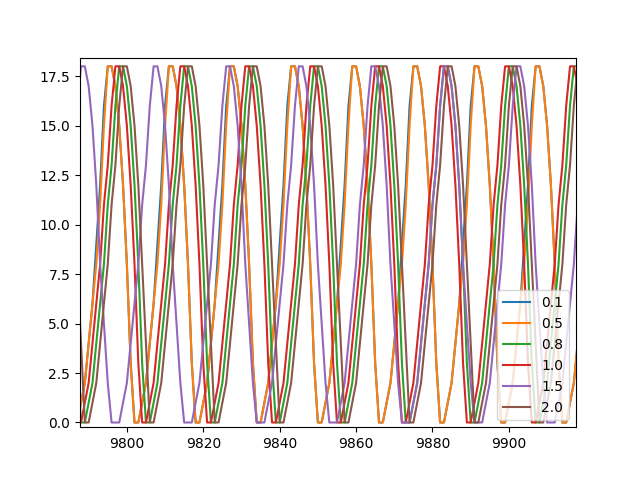

In [10]:
plt.figure()
for episode, cc in enumerate(contrasts):
    plt.plot(rec_episodes[episode].records[0])
plt.legend([str(cc) for cc in contrasts])